Scantron Math not encoded courses, RF, label: proficent_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix,f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
scantronMath_38_df = pd.read_csv('../dataframes/scantronMath_38.csv')
scantronMath_38_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

# w/ past_proficient_score

In [4]:
scantronMath_38_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
course_AIDELIB7-8NC                bool
course_AIDSTU6-12NC                bool
course_ARTHIS7-8                   bool
course_Advisory 5                  bool
course_Advisory 6                  bool
course_Advisory 7                  bool
course_Advisory 7-8                bool
course_Advisory 8                  bool
course_Aide Off 7-8                bool
course_BAND 6                      bool
course_BAND 7 Brass                bool
course_BAND 7 Percu                bool
course_BAND 7 Wood                 bool
course_BROADCAS 7-8                bool
course_Band 7                      bool
course_Band7                       bool
course_BandGuitar78                bool
course_CONTISSU 7-8                bool
course_CREAWRT 7-8                 bool
course_CSElec Gr7-8                bool


In [5]:
#turning bools into ints
scantronMath_38_df[scantronMath_38_df.select_dtypes(include=['bool']).columns] = scantronMath_38_df.select_dtypes(include=['bool']).astype(int)
scantronMath_38_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int64
proficient_score                float64
course_AIDELIB7-8NC               int64
course_AIDSTU6-12NC               int64
course_ARTHIS7-8                  int64
course_Advisory 5                 int64
course_Advisory 6                 int64
course_Advisory 7                 int64
course_Advisory 7-8               int64
course_Advisory 8                 int64
course_Aide Off 7-8               int64
course_BAND 6                     int64
course_BAND 7 Brass               int64
course_BAND 7 Percu               int64
course_BAND 7 Wood                int64
course_BROADCAS 7-8               int64
course_Band 7                     int64
course_Band7                      int64
course_BandGuitar78               int64
course_CONTISSU 7-8               int64
course_CREAWRT 7-8                int64
course_CSElec Gr7-8               int64


In [6]:
#checking missing 
print(scantronMath_38_df.isnull().sum())  

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
course_AIDELIB7-8NC                0
course_AIDSTU6-12NC                0
course_ARTHIS7-8                   0
course_Advisory 5                  0
course_Advisory 6                  0
course_Advisory 7                  0
course_Advisory 7-8                0
course_Advisory 8                  0
course_Aide Off 7-8                0
course_BAND 6                      0
course_BAND 7 Brass                0
course_BAND 7 Percu                0
course_BAND 7 Wood                 0
course_BROADCAS 7-8                0
course_Band 7                      0
course_Band7                       0
course_BandGuitar78                0
course_CONTISSU 7-8                0
course_CREAWRT 7-8                 0
course_CSElec Gr7-8                0
course_CareerPrep-A                0
course_CareerPrepA5                0
c

In [7]:
scantronMath_38_df = scantronMath_38_df.dropna(subset=['past_proficient_score'])
print(scantronMath_38_df.isnull().sum())  

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
course_AIDELIB7-8NC             0
course_AIDSTU6-12NC             0
course_ARTHIS7-8                0
course_Advisory 5               0
course_Advisory 6               0
course_Advisory 7               0
course_Advisory 7-8             0
course_Advisory 8               0
course_Aide Off 7-8             0
course_BAND 6                   0
course_BAND 7 Brass             0
course_BAND 7 Percu             0
course_BAND 7 Wood              0
course_BROADCAS 7-8             0
course_Band 7                   0
course_Band7                    0
course_BandGuitar78             0
course_CONTISSU 7-8             0
course_CREAWRT 7-8              0
course_CSElec Gr7-8             0
course_CareerPrep-A             0
course_CareerPrepA5             0
course_CivicH/Adv 7             0
course_CivicsGr 7               0
course_ContIss

Training

In [8]:
#training
y = scantronMath_38_df['proficient_score']
X= scantronMath_38_df.drop(['proficient_score', 'is_proficient', 'studentId','dataSource', 'level'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25,stratify= scantronMath_38_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 15149
(11361, 137)
(3788, 137)


In [10]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.
max_depth_values38 = [5,15, 30]
n_estimators_value38 = [100,250,400]
param_grid38 = {'max_depth' : list(max_depth_values38), 'n_estimators' : list(n_estimators_value38)}


print("Running Grid Search")
rf_regressor38 = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search38 = rf_grid38.fit(X_train, y_train)

print("Done")
rf_best_params38 = rf_grid_search38.best_params_

rf_best_params38

Running Grid Search
Done


{'max_depth': 5, 'n_estimators': 100}

In [11]:
rf_model38 = RandomForestRegressor(max_depth=5, n_estimators=100)
rf_model38.fit(X_train,y_train)
y_rf_pred38 = rf_model38.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred38, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred38)
#trying to get f1 and accuracy score 
threshold = 1
y_pred38_bool = y_rf_pred38 >= threshold
y_test38_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test38_bool, y_pred38_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.92      0.90      2581
        True       0.80      0.71      0.76      1207

    accuracy                           0.85      3788
   macro avg       0.84      0.82      0.83      3788
weighted avg       0.85      0.85      0.85      3788

[RF] Root Mean Squared Error: 0.04612379486416516
[RF] R2: 0.5977043052414293


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
#looking at the micro score
micro_f1 = f1_score(y_test38_bool, y_pred38_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.853220696937698


Confusion Matrix:
[[2371  210]
 [ 346  861]]


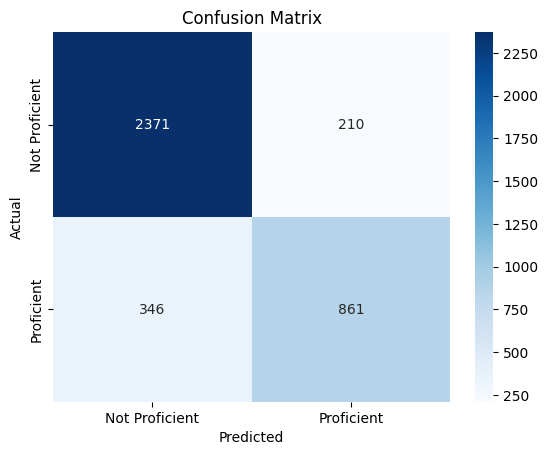

In [13]:
cm = confusion_matrix(y_test38_bool, y_pred38_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [14]:
importances = rf_model38.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                          Feature  Importance
136         past_proficient_score    0.948001
126    school_Elementary School E    0.004621
60                  course_MATH 5    0.002960
14                  course_Band 7    0.002687
17            course_CONTISSU 7-8    0.002342
105           course_Science Gr 5    0.002233
100               course_SOC ST 5    0.002115
49             course_HANDWRITING    0.002027
34              course_EngElec7-8    0.001786
54              course_LANGUAGE 4    0.001688
63               course_Marketing    0.001613
95               course_SCIENCE 5    0.001353
91               course_READING 4    0.001238
89                  course_READ 3    0.001235
94               course_SCIENCE 4    0.001184
78                    course_PE 4    0.001088
99                course_SOC ST 4    0.001028
59                  course_MATH 4    0.001011
112           course_SocialStuGr6    0.001008
115           course_StuAid6-12NC    0.001007
132        school_Middle School F 

In [ ]:
importance_df.head(20)
#interesting that math 5 is the only importance featues in top 20 instead of other math courses

,Feature,Importance
136,past_proficient_score,0.873007
132,school_Middle School F,0.004330
126,school_Elementary School E,0.004209
100,course_SOC ST 5,0.004045
60,course_MATH 5,0.003770
131,school_Middle School D,0.003633
14,course_Band 7,0.003584
105,course_Science Gr 5,0.003558
95,course_SCIENCE 5,0.003090
106,course_Science Gr 6,0.002914


# no past_proficient_score

In [30]:
scantronMath_38_df = pd.read_csv('../dataframes/scantronMath_38.csv')
scantronMath_38_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

Training

In [17]:
#training
y = scantronMath_38_df['proficient_score']
X= scantronMath_38_df.drop(['proficient_score', 'is_proficient', 'studentId','dataSource', 'level', 'past_proficient_score'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25,stratify= scantronMath_38_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 20571
(15428, 136)
(5143, 136)


In [18]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.
max_depth_values38 = [5,15, 30]
n_estimators_value38 = [100,250,400]
param_grid38 = {'max_depth' : list(max_depth_values38), 'n_estimators' : list(n_estimators_value38)}


print("Running Grid Search")
rf_regressor38 = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search38 = rf_grid38.fit(X_train, y_train)

print("Done")
rf_best_params38 = rf_grid_search38.best_params_

rf_best_params38

Running Grid Search
Done


{'max_depth': 5, 'n_estimators': 250}

In [24]:
rf_model38 = RandomForestRegressor(max_depth=5, n_estimators=250)
rf_model38.fit(X_train,y_train)
y_rf_pred38 = rf_model38.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred38, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred38)
#trying to get f1 and accuracy score 
threshold = 1.0
y_pred38_bool = y_rf_pred38 >= threshold
y_test38_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test38_bool, y_pred38_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.70      1.00      0.82      3552
        True       0.85      0.03      0.06      1591

    accuracy                           0.70      5143
   macro avg       0.77      0.52      0.44      5143
weighted avg       0.75      0.70      0.59      5143

[RF] Root Mean Squared Error: 0.08441745036134432
[RF] R2: 0.021742488419131845


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


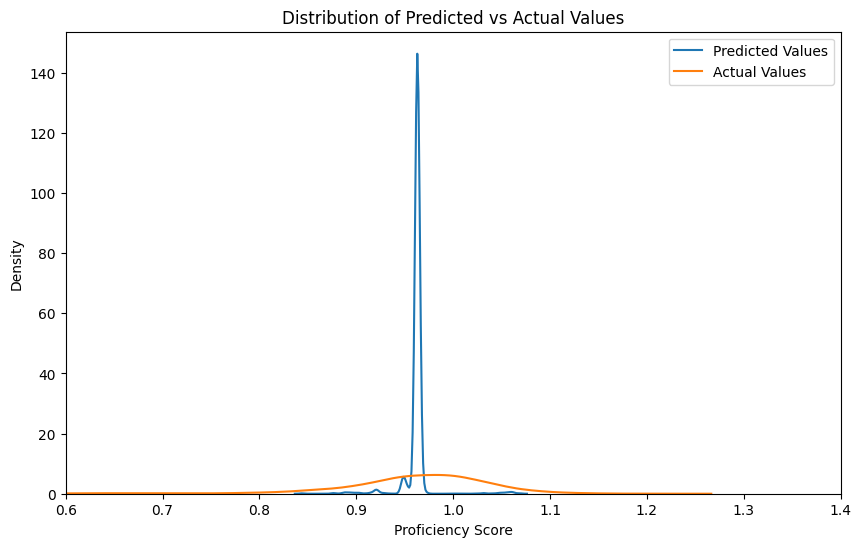

In [31]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=y_rf_pred38, label='Predicted Values')
sns.kdeplot(data=y_test, label='Actual Values')
plt.title('Distribution of Predicted vs Actual Values')
plt.xlim(0.6, 1.4)
plt.xlabel('Proficiency Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [28]:
#looking at the micro score
micro_f1 = f1_score(y_test38_bool, y_pred38_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.6990083608788644


Confusion Matrix:
[[3543    9]
 [1539   52]]


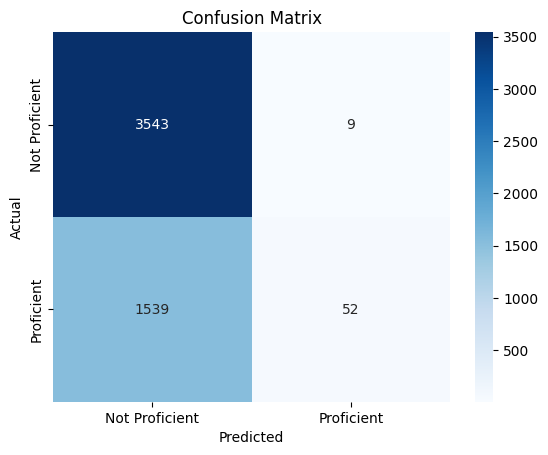

In [29]:
cm = confusion_matrix(y_test38_bool, y_pred38_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [ ]:
importances = rf_model38.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                          Feature  Importance
136         past_proficient_score    0.948001
126    school_Elementary School E    0.004621
60                  course_MATH 5    0.002960
14                  course_Band 7    0.002687
17            course_CONTISSU 7-8    0.002342
105           course_Science Gr 5    0.002233
100               course_SOC ST 5    0.002115
49             course_HANDWRITING    0.002027
34              course_EngElec7-8    0.001786
54              course_LANGUAGE 4    0.001688
63               course_Marketing    0.001613
95               course_SCIENCE 5    0.001353
91               course_READING 4    0.001238
89                  course_READ 3    0.001235
94               course_SCIENCE 4    0.001184
78                    course_PE 4    0.001088
99                course_SOC ST 4    0.001028
59                  course_MATH 4    0.001011
112           course_SocialStuGr6    0.001008
115           course_StuAid6-12NC    0.001007
132        school_Middle School F 

In [ ]:
importance_df.head(20)
#interesting that math 5 is the only importance featues in top 20 instead of other math courses

,Feature,Importance
136,past_proficient_score,0.873007
132,school_Middle School F,0.004330
126,school_Elementary School E,0.004209
100,course_SOC ST 5,0.004045
60,course_MATH 5,0.003770
131,school_Middle School D,0.003633
14,course_Band 7,0.003584
105,course_Science Gr 5,0.003558
95,course_SCIENCE 5,0.003090
106,course_Science Gr 6,0.002914
